In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from numpy.random import rand
import matplotlib.pylab as plt

In [148]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
from numpy.random import rand
import matplotlib.pylab as plt

def RandSmpl(data, n_minutes, m_samples):
    for i in range(0, m_samples):
        indx = np.floor(rand(n_minutes) * data.shape[0] )
        smp = data.iloc[indx]       
        yield smp        

def RandSmplSeq(data, n_minutes, m_samples):
    rng = data.index[-1] - data.index[0]
    
    for i in range(0, m_samples):
        indx = rand() * rng + data.index[0]
        smp = data.loc[indx:indx+n_minutes]        
        yield smp        
        
def ReverseArrangement(smp, dirn=1):
    """
    smp assumed to be ordered
    """    
    # "A" from the murray paper
    if dirn > 0:
        A = [ np.sum(smp[i+1:] > smp[i], axis=0) for i in range(0, len(smp))]
    else:
        A = [ np.sum(smp[i+1:] < smp[i], axis=0) for i in range(0, len(smp))]
                 
    return np.atleast_1d(np.sum(A, axis=0))




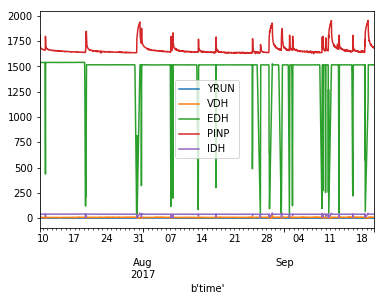

In [32]:
df.plot()

In [84]:
A = df.rolling(60)
res = A.apply(ReverseArrangement)
res *= 4/(61.*60)


In [142]:
before_rev = res[res.index < '2017-09-15 15:45:00']
before_df = df[df.index < '2017-09-15 15:45:00']

after_rev = res[res.index >= '2017-09-15 15:45:00']
after_df = df[df.index >= '2017-09-15 15:45:00']

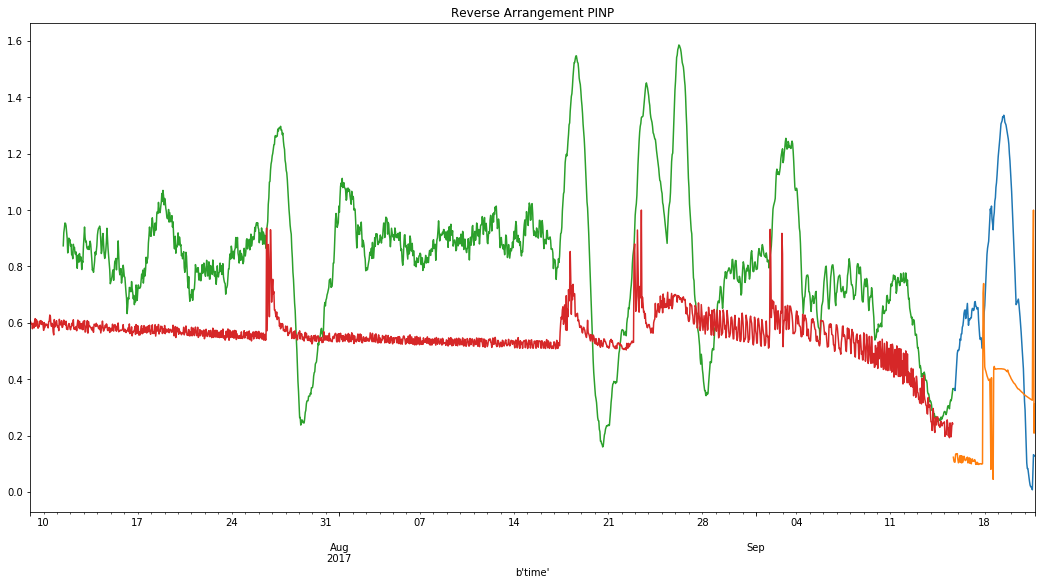

In [143]:
#x = res[res.index > '2017-09-15 15:45:00']
plt.figure(figsize=(18,9))


after_rev['PINP'].plot()
(after_df['PINP']/after_df['PINP'].max()  ).plot()


before_rev['PINP'].plot()
(before_df['PINP']/before_df['PINP'].max()  ).plot()
#plt.ylim([0,2])
plt.title('Reverse Arrangement PINP')


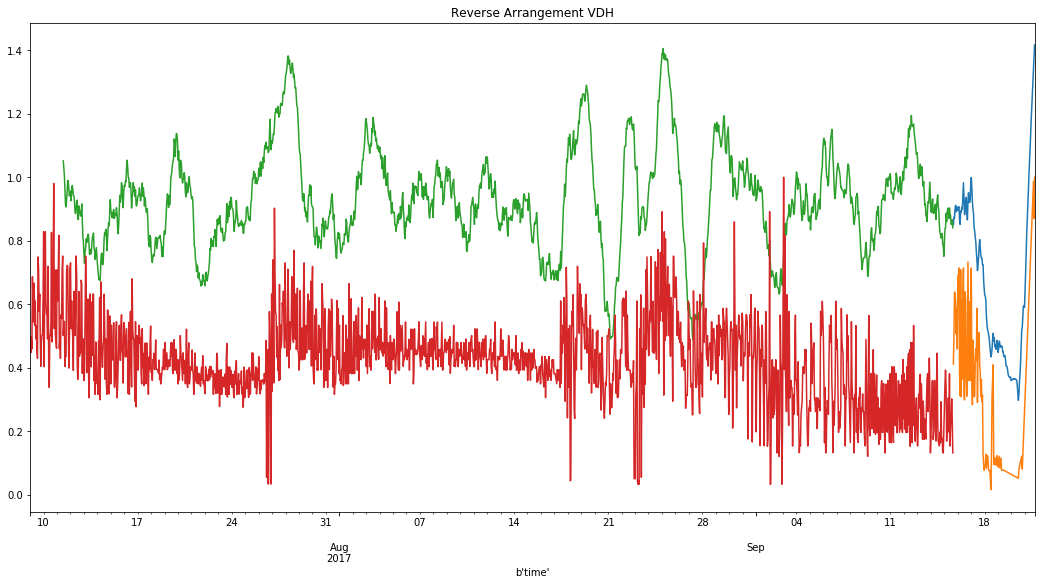

In [144]:
plt.figure(figsize=(18,9))


after_rev['VDH'].plot()
(after_df['VDH']/after_df['VDH'].max()  ).plot()


before_rev['VDH'].plot()
(before_df['VDH']/before_df['VDH'].max()  ).plot()
#plt.ylim([0,2])
plt.title('Reverse Arrangement VDH')



In [165]:
train_rev1 = res[res.index < '2017-08-01 15:45:00']
train_df1 = df[df.index < '2017-08-01 15:45:00']

train_rev2 = res[res.index > '2017-09-15 15:45:00']
train_df2 = df[df.index > '2017-09-15 15:45:00']

In [172]:
# This is the best for the demo because the well data is not "well" organized yet
pinp = []
vdh = []

for i in RandSmplSeq(train_df1, 60, 500):
    pinp.append(ReverseArrangement(i['PINP'].values,dirn=1)*4/(61*60))
    vdh.append(ReverseArrangement(i['VDH'].values,dirn=1)*4/(61*60))

 
for i in RandSmplSeq(train_df2, 60, 100):
    pinp.append(ReverseArrangement(i['PINP'].values,dirn=1)*4/(61*60))
    vdh.append(ReverseArrangement(i['VDH'].values,dirn=1)*4/(61*60))


In [175]:
pinp = np.array(pinp)
vdh = np.array(vdh)
klass = np.ones(600)
klass[500:] = -1

input = np.vstack([pinp, vdh]).T

In [178]:
from sklearn import svm
from sigopt_sklearn.search import SigOptSearchCV

client_token = 'GTIUUZSJMPWEFPHYZRTAGRGLEOSMFTMDZKHEZFLHYVUNUSQK'

svc_parameters  = {'kernel': ['linear', 'rbf'], 'C': (0.5, 100)}

# we probably should have compact support 
svr = svm.SVC()

clf = SigOptSearchCV(svr, svc_parameters, cv=5,
                client_token=client_token, n_jobs=5, n_iter=20)

clf.fit(inputs, klass)

print(clf)

ImportError: No module named 'sigopt_sklearn'